In [ ]:
#Import Library

import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import glob
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
import os
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

In [ ]:
from google.colab import drive

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
# Define directories
train_dir = '/content/drive/My Drive/Colab_Notebooks/Strawbbery_Disease/Strawberry/Train'
validation_dir = '/content/drive/My Drive/Colab_Notebooks/Strawbbery_Disease/Strawberry/Val'
test_dir = '/content/drive/My Drive/Colab_Notebooks/Strawbbery_Disease/Strawberry/Test'

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# 1. Load and preprocess the Strawberry dataset
datagen = ImageDataGenerator(rescale=1./255)
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False)

validation_generator = datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False)

test_generator = datagen.flow_from_directory(
    test_dir ,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False)

Found 3663 images belonging to 2 classes.
Found 819 images belonging to 2 classes.
Found 91 images belonging to 2 classes.


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


115/115 ━━━━━━━━━━━━━━━━━━━━ 2437s 21s/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 532s 20s/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 59s 19s/step
Classification Report (Validation):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       410
           1       1.00      1.00      1.00       409

    accuracy                           1.00       819
   macro avg       1.00      1.00      1.00       819
weighted avg       1.00      1.00      1.00       819

Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        45

    accuracy                           1.00        91
   macro avg       1.00      1.00      1.00        91
weighted avg       1.00      1.00      1.00        91

Confusion Matrix (Test):
[[46  0]
 [ 0 45]]


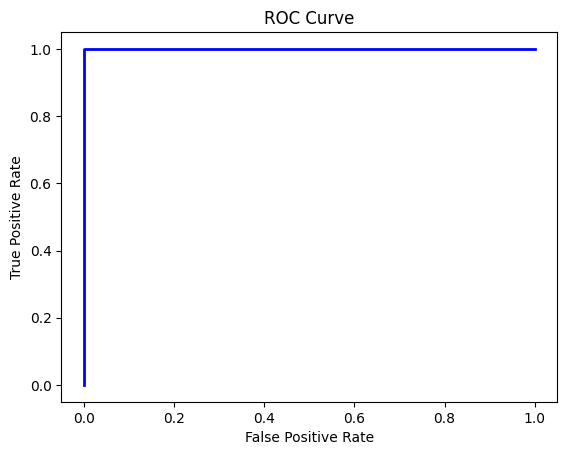

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
import numpy as np

# 2. Load VGG16 model for feature extraction
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# 3. Extract features
def extract_features(generator, model):
    features = model.predict(generator)
    features_flat = features.reshape(features.shape[0], -1)
    return features_flat

train_features = extract_features(train_generator, vgg16_model)
validation_features = extract_features(validation_generator, vgg16_model)
test_features = extract_features(test_generator, vgg16_model)

# Get labels
train_labels = train_generator.classes
validation_labels = validation_generator.classes
test_labels = test_generator.classes

# 4. Train a classification algorithm
svm_classifier = SVC(kernel='linear', probability=True)
svm_classifier.fit(train_features, train_labels)

# 5. Evaluate the model
validation_predictions = svm_classifier.predict(validation_features)
test_predictions = svm_classifier.predict(test_features)

print("Classification Report (Validation):")
print(classification_report(validation_labels, validation_predictions))

print("Classification Report (Test):")
print(classification_report(test_labels, test_predictions))

# Confusion Matrix
print("Confusion Matrix (Test):")
print(confusion_matrix(test_labels, test_predictions))

# ROC Curve
fpr, tpr, thresholds = roc_curve(test_labels, svm_classifier.predict_proba(test_features)[:,1])

# Plot the ROC Curve if needed
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


Classification Report (Validation):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       410
           1       1.00      1.00      1.00       409

    accuracy                           1.00       819
   macro avg       1.00      1.00      1.00       819
weighted avg       1.00      1.00      1.00       819

Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        45

    accuracy                           1.00        91
   macro avg       1.00      1.00      1.00        91
weighted avg       1.00      1.00      1.00        91

Confusion Matrix (Test):
[[46  0]
 [ 0 45]]


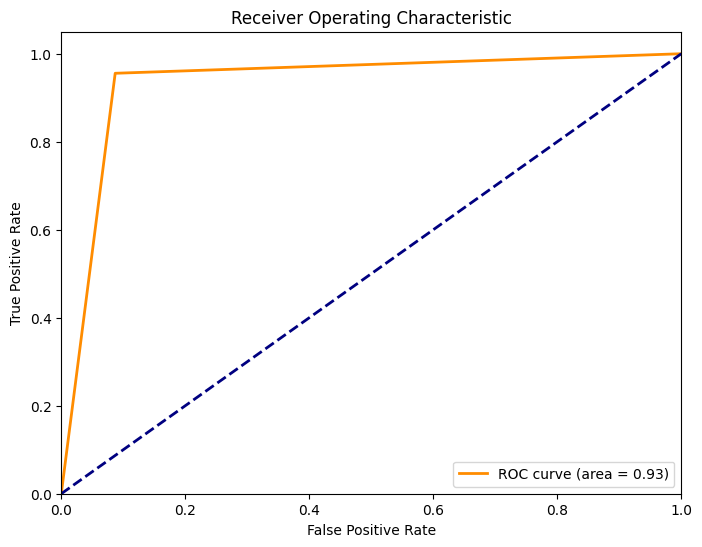

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve,auc
import numpy as np

# Train a classification algorithm
svm_classifier = SVC(kernel='linear', probability=True)
svm_classifier.fit(train_features, train_labels)

# Evaluate the model
validation_predictions = svm_classifier.predict(validation_features)
test_predictions = svm_classifier.predict(test_features)

print("Classification Report (Validation):")
print(classification_report(validation_labels, validation_predictions))

print("Classification Report (Test):")
print(classification_report(test_labels, test_predictions))

# Confusion Matrix
print("Confusion Matrix (Test):")
print(confusion_matrix(test_labels, test_predictions))


# ROC Curve
fpr, tpr, thresholds = roc_curve(test_labels, svm_classifier.predict_proba(test_features)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**Dicesion Tree**

Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       410
           1       0.94      0.92      0.93       409

    accuracy                           0.93       819
   macro avg       0.93      0.93      0.93       819
weighted avg       0.93      0.93      0.93       819

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        46
           1       0.91      0.96      0.93        45

    accuracy                           0.93        91
   macro avg       0.93      0.93      0.93        91
weighted avg       0.93      0.93      0.93        91

Confusion Matrix (Test):
[[42  4]
 [ 2 43]]


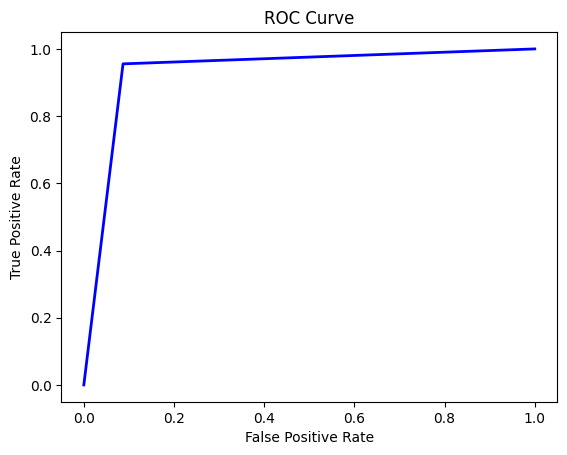

In [ ]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import numpy as np

# Train a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(train_features, train_labels)

# Evaluate the model
validation_predictions = dt_classifier.predict(validation_features)
test_predictions = dt_classifier.predict(test_features)

print("Classification Report (Validation):")
print(classification_report(validation_labels, validation_predictions))

print("Classification Report (Test):")
print(classification_report(test_labels, test_predictions))

# Confusion Matrix
print("Confusion Matrix (Test):")
print(confusion_matrix(test_labels, test_predictions))

# ROC Curve
fpr, tpr, thresholds = roc_curve(test_labels, dt_classifier.predict_proba(test_features)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Classification Report (Validation):
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       410
           1       0.99      1.00      1.00       409

    accuracy                           1.00       819
   macro avg       1.00      1.00      1.00       819
weighted avg       1.00      1.00      1.00       819

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        46
           1       1.00      0.98      0.99        45

    accuracy                           0.99        91
   macro avg       0.99      0.99      0.99        91
weighted avg       0.99      0.99      0.99        91

Confusion Matrix (Test):
[[46  0]
 [ 1 44]]


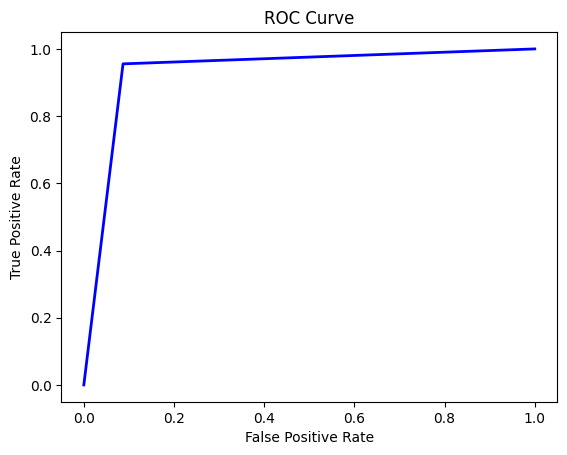

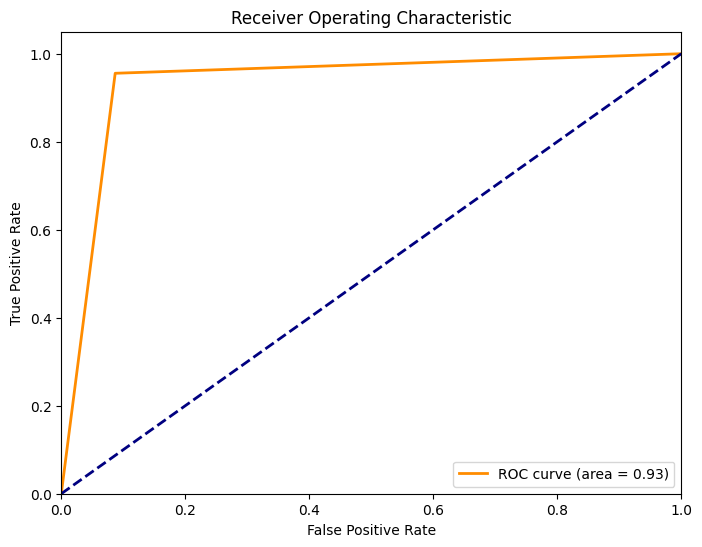

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, auc
import numpy as np

#  Train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(train_features, train_labels)

#  Evaluate the model
validation_predictions = rf_classifier.predict(validation_features)
test_predictions = rf_classifier.predict(test_features)

print("Classification Report (Validation):")
print(classification_report(validation_labels, validation_predictions))

print("Classification Report (Test):")
print(classification_report(test_labels, test_predictions))

# Confusion Matrix
print("Confusion Matrix (Test):")
print(confusion_matrix(test_labels, test_predictions))

# ROC Curve
fpr, tpr, thresholds = roc_curve(test_labels, rf_classifier.predict_proba(test_features)[:,1])
roc_auc = auc(fpr, tpr)
# Plot the ROC Curve if needed
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

